In [ ]:
# Data Preprocessing
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RepeatedStratifiedKFold,
)

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('CPET_processed.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Class,LowestVE/VCO2,PeakVE/VCO2,MeanVE/VCO2,DiffPercentPeakVO2,MeanVO2,MeanVCO2,PeakVCO2,MeanO2Pulse,MaxO2Pulse,O2PulsePercent,second_half_VESlope,0_to_25_VO2Slope,0_to_25_HRSlope,0_to_25_O2Slope,75_to_100_VESlope,PeakVO2Real
0,0,-1.437322,1.533367,-0.147972,-0.022886,-0.399094,-0.682272,-0.072394,-0.383131,0.189349,0.941863,-0.383131,-0.300556,0.592106,-0.095783,0.319275,0.119931
1,0,-0.079235,1.232517,-0.293120,-0.697917,-0.111746,-0.376875,-0.299815,-0.415058,-0.612227,-0.686442,0.670478,-0.267041,0.455812,-0.079819,1.309029,-0.256723
2,1,-0.617345,0.876966,-0.422140,1.728980,1.436739,1.423357,1.519551,0.957826,1.103147,1.564450,0.941863,0.520567,-0.517723,0.015964,1.628305,1.500993
3,1,-0.053610,-0.052936,-0.067334,1.712908,1.676196,1.680533,1.711983,1.548486,1.552029,1.452703,-1.197283,1.727116,-0.167251,1.532522,-0.973790,1.734159
4,1,-0.309853,0.439365,-0.212482,1.680764,1.484631,1.551945,1.432081,1.117464,1.247430,1.596377,1.340957,0.805447,1.760348,0.526804,-1.596377,1.483057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2,0.766367,-0.463186,0.513257,-1.003288,-0.638551,-0.730492,-1.087040,-0.638551,0.093160,-0.335239,-0.638551,-1.071406,-1.549670,-0.957826,-1.676196,-0.507825
213,2,0.996986,0.275265,1.077720,-1.485453,-1.293065,-1.502021,-1.366943,-0.750297,-0.676353,-0.734333,-0.367167,-1.037891,-1.101844,-0.846080,1.101500,-1.099709
214,2,0.253881,-0.928137,-0.486650,0.057475,-0.159638,-0.135773,-0.387284,-0.399094,-0.435880,0.191565,-1.053609,-0.535163,-1.101844,-0.223493,-0.191565,-0.346402
215,2,1.227604,1.423967,1.448654,-1.437237,-1.484631,-1.566315,-1.559375,-0.462949,-0.788574,-0.989754,-1.612341,-0.149737,-0.965549,0.446986,-1.548486,-1.458426


In [ ]:
y = df["Class"]
x = df.drop('Class', axis=1)


# 70-30 Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2023)


1    67
2    34
0    29
3    21
Name: Class, dtype: int64


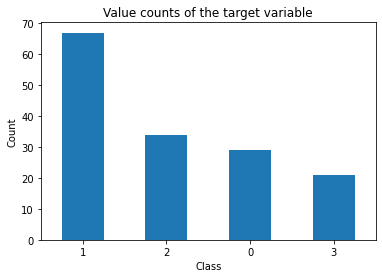

In [ ]:
# Distribution of training set

print(y_train.value_counts())


y_train.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

1    28
0    22
2    11
3     5
Name: Class, dtype: int64


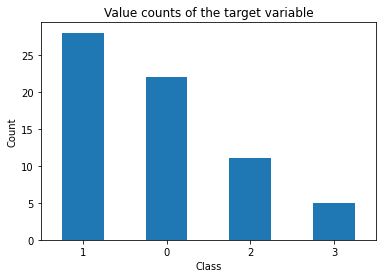

In [ ]:
# Distribution of test set

print(y_test.value_counts())


y_test.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [ ]:
# Resampling using SMOTE
# Data before oversampling: {0: 29, 1: 67, 2: 34, 3: 21}
oversampling_strat = {0: 34, 3: 34}
over = SMOTE(random_state=0, sampling_strategy=oversampling_strat)

x_train, y_train = over.fit_resample(x_train, y_train)

# Undersampling using RandomUnderSampler
# Data before undersampling: {0: 34, 1: 67, 2: 34, 3: 34}
undersampling_strat = {1: 34}
under = RandomUnderSampler(random_state=0,
                           sampling_strategy=undersampling_strat)

x_train, y_train = under.fit_resample(x_train, y_train)

# Distribution of train set

print(y_train.value_counts())

0    34
1    34
2    34
3    34
Name: Class, dtype: int64


In [ ]:
# Train set

train_set = x_train
train_set["Class"] = y_train
train_set

,LowestVE/VCO2,PeakVE/VCO2,MeanVE/VCO2,DiffPercentPeakVO2,MeanVO2,MeanVCO2,PeakVCO2,MeanO2Pulse,MaxO2Pulse,O2PulsePercent,second_half_VESlope,0_to_25_VO2Slope,0_to_25_HRSlope,0_to_25_O2Slope,75_to_100_VESlope,PeakVO2Real,Class
0,0.125760,-0.244386,-0.196355,-0.858639,-0.015964,-0.312581,-0.422272,-0.143674,-0.243502,-0.574696,-0.526804,-1.423316,-1.335492,-1.293065,0.893971,-0.418146,0
1,0.638246,0.466715,0.464874,-0.521123,-1.149392,-1.196624,-1.209497,-1.165355,-1.237457,-1.404812,-0.973790,-1.339528,-0.011485,-1.165355,-0.079819,-1.135581,0
2,-0.668593,-0.709337,-0.760818,-0.408618,-0.510841,-0.441169,0.032569,-0.670478,-0.483975,-0.878007,1.628305,0.637871,1.429346,0.686442,-0.878007,-0.436081,0
3,-1.667941,0.959016,-0.986604,0.073547,-0.223493,-0.071479,0.085051,-0.622587,-0.580164,-1.037645,0.031928,-0.200010,0.981520,-0.287348,0.638551,0.012315,0
4,0.689494,-0.791387,0.093941,-1.501526,0.782225,1.117960,-0.194851,0.606623,-0.323660,-0.670478,-0.814152,0.202173,0.806284,-0.175601,-0.063855,-0.310530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.537686,1.346894,1.628013,-1.519872,-1.346444,-1.169677,-0.923420,-1.095219,-1.150343,-1.394658,-1.359154,-0.674306,-1.314053,-0.249785,-0.644858,-1.162220,3
132,1.552252,1.406007,1.639554,-1.488006,-1.405085,-1.258640,-1.040939,-1.192417,-1.232502,-1.423584,-1.434272,-0.719712,-1.257359,-0.485282,-0.772220,-1.231571,3
133,-0.375444,-0.831152,-0.703849,-0.954853,-0.826302,-0.606842,-0.626049,-1.333711,-1.271271,-1.482833,-0.673857,-0.252113,-0.919962,-0.134793,-0.198539,-0.864400,3
134,1.640924,1.707042,1.708790,-1.378409,-1.709562,-1.687352,-1.654545,-1.703336,-1.673836,-1.606753,-1.434047,-0.964326,-0.998451,-1.583618,-1.543535,-1.615186,3


In [ ]:
# Test set

test_set = x_test
test_set["Class"] = y_test

In [ ]:
# Exporting train and test set

train_set.to_csv('gdrive/MyDrive/CS177/Final Project/train_set.csv', index=False)
test_set.to_csv('gdrive/MyDrive/CS177/Final Project/test_set.csv', index=False)